In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
class Lattice():
    def __init__(self, size):
        self.size = size
        self.G = nx.Graph()
        self.nodes = [(i, j) for i in range(size) for j in range(size)]
        self.G.add_nodes_from(self.nodes)
        self.pos = {(x,y) : (x,-y) for x,y in self.G.nodes()}
        self.top_nodes = [(i,0) for i in range(self.size)]
        self.bottom_nodes = [(j,self.size-1) for j in range(self.size)]
        
    def show(self):       #To display the grid graph
        nx.draw(self.G,node_size=0.05,node_color='blue',pos=self.pos,with_labels=False,edge_color='r')       
        plt.show() 

    def percolate(self,p):        #   Simulate bond percolation
        for node in self.nodes:
            i,j = node
            if i>0:
                self.G.add_edge((i,j),(i-1,j))
            if j>0:
                self.G.add_edge((i,j),(i,j-1))
        
        for edge in self.G.edges(): # "bonds" between each two neighbors may be open with probability p, or closed with probability 1 – p
            if random.uniform(0,1)<p:
                self.G[edge[0]][edge[1]]['weight'] = 1
            else:
                self.G[edge[0]][edge[1]]['weight'] = 0
                self.G.remove_edge(edge[0],edge[1])

    def existsTopDownPath(self):
        for node in self.top_nodes:
            if any([nx.has_path(self.G, node, bottom_node) for bottom_node in self.bottom_nodes]):
                return True
        return False
    
    # def existsTopDownPath(self):  #  Function that returns True if there exists a path from the top-most layer to the bottom-most layer 
    #     for node in self.top_nodes:
    #         if nx.has_path(self.G,node,self.bottom_nodes[0]):
    #             return True
    #     return False

    def showPaths(self):
        nx.draw(self.G,node_size=0.1,node_color='blue',pos=self.pos,with_labels=False,edge_color='r')       
        for top_node in self.top_nodes:
            flag = 1
            for bottom_node in self.bottom_nodes:
                if nx.has_path(self.G,top_node,bottom_node):
                    path = nx.shortest_path(self.G,top_node,bottom_node)   #   Find shortest path from top node to all bottom nodes
                    if flag == 0 and len(path)<len(short):
                        short = path
                    elif flag == 1:
                        short = path
                        flag = 0
            
            if flag == 1:         #   To handle the largest shortest path originating from top node
                lengths = nx.single_source_shortest_path_length(self.G,top_node)                          
                pathusingbellman = nx.bellman_ford_path(self.G,top_node,max(lengths, key=lengths.get))                    
                path_edges=list(zip(pathusingbellman,pathusingbellman[1:]))   # These are the edges along the path we find  
                
            #Shortest path to bottom-most layer                  
            else:
                path_edges = list(zip(short,short[1:]))
            nx.draw_networkx_edges(self.G, node_size=0.1, pos=self.pos, edge_color='green', width=2, edgelist=path_edges)
            
        plt.show()


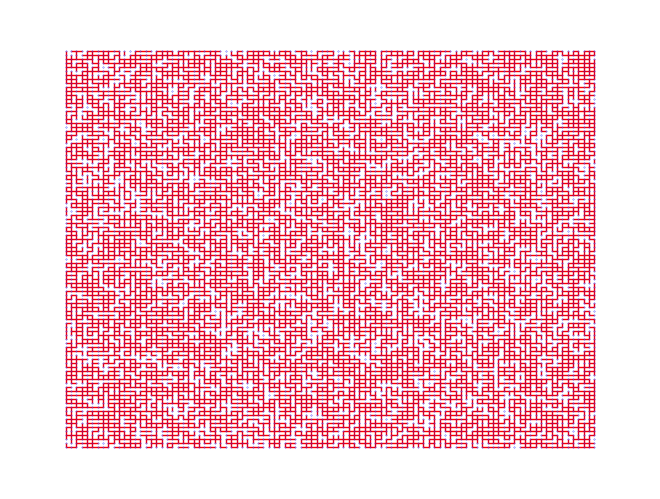

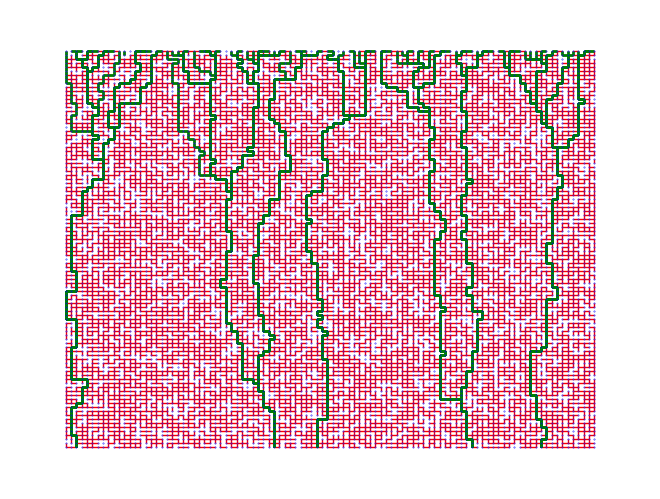

True


In [3]:
L = Lattice(100)
L.percolate(0.7)
L.show()
L.showPaths()
print(L.existsTopDownPath())